In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

A quick comparison of LinearRegression vs SVR on small data.

In [2]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

<IPython.core.display.Javascript object>

In [3]:
# Generate some example data
x = np.arange(0, 1, 1 / 10)
df = pd.DataFrame({"x": x, "y": x})
df.iloc[-2, 1] -= 0.1

X = df[["x"]]
y = df["y"]

<IPython.core.display.Javascript object>

In [4]:
# Quick and dirty fit
lm = LinearRegression().fit(X, y)
svr = SVR(kernel="linear", epsilon=0.05, C=1000000).fit(X, y)

# Store predictions to draw lines
df["lm_y"] = lm.predict(X)
df["svr_y"] = svr.predict(X)

<IPython.core.display.Javascript object>

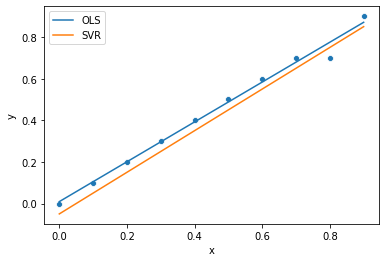

<IPython.core.display.Javascript object>

In [5]:
# Plot original data and lines
sns.scatterplot("x", "y", data=df)
plt.plot(df["x"], df["lm_y"], label="OLS")
plt.plot(df["x"], df["svr_y"], label="SVR")
plt.legend()
plt.show()

We have very similar lines and the coefficients/intercepts agree.  We can interpret this coeficient from SVR like a linear regression one.  However, as soon as we start using another kernel, this coeficient intrepretation goes away.

In [6]:
lm.coef_

array([0.95757576])

<IPython.core.display.Javascript object>

In [7]:
lm.intercept_

0.009090909090909094

<IPython.core.display.Javascript object>

In [8]:
svr.coef_

array([[1.00000572]])

<IPython.core.display.Javascript object>

In [9]:
svr.intercept_

array([-0.05000495])

<IPython.core.display.Javascript object>

OLS tries to minimze the sum of squared errors (minmize mistakes and penalize big mistakes a little extra):
$$min \sum_{i=1}^{n}(y_i - (w^Tx_i + b))^2$$ 

* $w$ is the coefficients
* $x_i$ is a training sample (aka feature vector; aka row of `X`)
* $y_i$ is a training sample's true value
* $b$ is the intercept

SVR tries to minimize the coefficients and ensure every single observation lies within the 'tube' of error we say its allowed to have (defined by epsilon).  In real cases, we need some slack, not every observation will be in the tube.  Just like in `SVC` we say how much we care about mistakes (here a mistake is falling outside of the tube) using the parameter `C`.  Below is how we can think of the formulation of the problem. **This is not the actual formulation**, but I think it's a useful view of it for more thorough math see [here](http://kernelsvm.tripod.com/).

$$min \frac{1}{2}||w||^2 + C \sum_{i=1}^{n}\xi_i$$

If $|y_i - (w^Tx_i + b)| \le epsilon$ then we don't count it in the error term in the above formula (that is $\xi_i = 0$).

If $|y_i - (w^Tx_i + b)| > epsilon$ then we do count it in the error term in the above formula (that is $\xi_i > 0$).

* $w$ is the coefficients
* $x_i$ is a training sample (aka feature vector; aka row of `X`)
* $y_i$ is a training sample's true value
* $b$ is the intercept
* $\xi$ is a measure of error (called slack)